### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import yfinance
start_date = "2017-01-01"
end_date = "2023-06-01"
symbol = "IOC.NS"

df = yfinance.download(tickers = symbol,start="2010-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2010-03-08,26.707163,26.767480,26.375423,26.508982,3420936
2010-03-09,26.590842,26.668391,26.207402,26.315111,2820648
2010-03-10,26.160012,26.444362,26.069539,26.349579,2508072
2010-03-11,26.452976,26.625309,25.983371,26.220329,3387942
2010-03-12,26.280640,26.323723,26.030759,26.172934,1900506
...,...,...,...,...,...
2023-08-24,91.699997,93.250000,91.550003,92.250000,9936618
2023-08-25,91.949997,93.199997,91.650002,91.800003,7021529
2023-08-28,92.250000,92.500000,91.699997,91.900002,6866040


In [2]:
import pandas as pd
import seaborn as sns

In [31]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-03-08,26.707163,26.767480,26.375423,26.508982,3420936
2010-03-09,26.590842,26.668391,26.207402,26.315111,2820648
2010-03-10,26.160012,26.444362,26.069539,26.349579,2508072
2010-03-11,26.452976,26.625309,25.983371,26.220329,3387942
2010-03-12,26.280640,26.323723,26.030759,26.172934,1900506


In [32]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-24,91.699997,93.250000,91.550003,92.250000,9936618
2023-08-25,91.949997,93.199997,91.650002,91.800003,7021529
2023-08-28,92.250000,92.500000,91.699997,91.900002,6866040
2023-08-29,92.050003,92.400002,91.599998,91.900002,6510089
2023-08-30,91.500000,91.500000,90.599998,90.750000,10911480


In [33]:
df1 = df.reset_index()['Close']

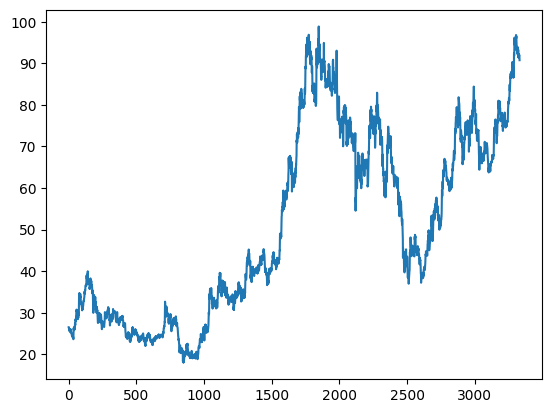

In [34]:
import matplotlib.pyplot as plt
plt.plot(df1)

<Axes: xlabel='Close'>

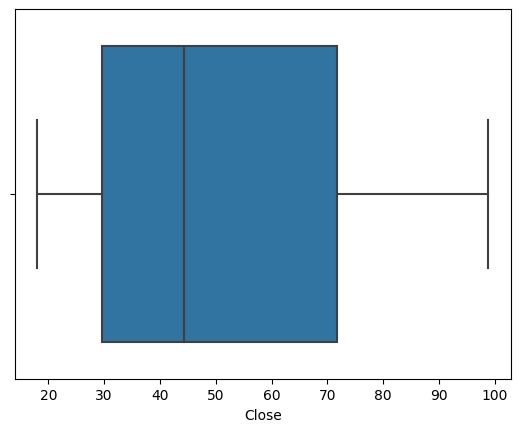

In [22]:
sns.boxplot(x="Close",data=df)

In [35]:
import numpy as np

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
df1    =  scaler.transform(df1)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [27]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]

In [28]:
training_size,test_size

(2165, 1166)

In [29]:
train_data.shape

(2165,)

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    print(len(dataset)-time_step-1)
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return numpy.array(dataX), numpy.array(dataY)

In [30]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

2134
1135


KeyError: 30

In [16]:
print(X_train.shape), print(y_train.shape)

(2134, 30)
(2134,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

NameError: name 'X_test' is not defined

In [78]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [79]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [80]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
33/33 [==============================] - 13s 222ms/step - loss: 0.0219 - val_loss: 0.0026
Epoch 2/100
33/33 [==============================] - 7s 208ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 3/100
33/33 [==============================] - 6s 170ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 4/100
33/33 [==============================] - 6s 168ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 5/100
33/33 [==============================] - 6s 179ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 6/100
33/33 [==============================] - 6s 170ms/step - loss: 9.9904e-04 - val_loss: 0.0020
Epoch 7/100
33/33 [==============================] - 6s 187ms/step - loss: 9.3254e-04 - val_loss: 0.0015
Epoch 8/100
33/33 [==============================] - 6s 175ms/step - loss: 8.6687e-04 - val_loss: 0.0014
Epoch 9/100
33/33 [==============================] - 6s 171ms/step - loss: 9.2572e-04 - val_loss: 0.0014
Epoch 10/100
33/33 [==============================] - 6s 170ms/step - loss

In [83]:
import tensorflow as tf

In [32]:
tf.__version__

'2.13.0'

In [84]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

34/34 [==============================] - 1s 40ms/step


In [107]:
d =scaler.inverse_transform(df1)
d

array([[0.10480769],
       [0.10240888],
       [0.10283531],
       ...,
       [0.93799529],
       [0.93366487],
       [0.91881772]])

In [70]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [103]:
train_predict

array([[0.00242133],
       [0.00235525],
       [0.00228556],
       ...,
       [0.00851637],
       [0.00858371],
       [0.00864911]], dtype=float32)

In [85]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.4189252597609577

In [86]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.5896942062759852

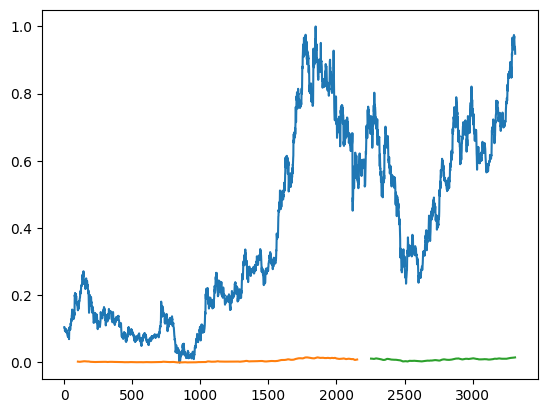

In [101]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

1160

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 819)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [440]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.2980493  0.2980493  0.28621777 0.29165389 0.31531701 0.2868573
 0.28014216 0.26639193 0.26127558 0.25232194 0.25871736 0.25583951
 0.26287446 0.25743824 0.2596767  0.2344147  0.23761246 0.25072316
 0.25296152 0.2596767  0.27022922 0.2727874  0.27374665 0.30892164
 0.32778817 0.32554976 0.33322429 0.32618929 0.34857335 0.37223647
 0.3565676  0.35209087 0.34185812 0.34153831 0.32810794 0.31947411
 0.31627631 0.31947411 0.32235205 0.33993952 0.34825358 0.33386382
 0.32075317 0.34697447 0.33386382 0.32267187 0.32459046 0.34185812
 0.33866046 0.33929999 0.32778817 0.33290452 0.33002649 0.32778817
 0.33578251 0.329387   0.32459046 0.31563682 0.33258476 0.34153831
 0.37447483 0.36520152 0.379911   0.37031778 0.37639353 0.37415512
 0.36903871 0.34313723 0.34249765 0.32810794 0.33290452 0.33066607
 0.33450335 0.329387   0.33386382 0.3335441  0.32586953 0.33226499
 0.31915434 0.33674177 0.33322429 0.33961976 0.34633489 0.34505583
 0.34185812 0.34153831 0.33898018 0.33450335 0.3383

ValueError: cannot reshape array of size 818 into shape (1,100,1)

In [46]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [47]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

3314

ValueError: x and y must have same first dimension, but have shapes (100,) and (2156, 1)

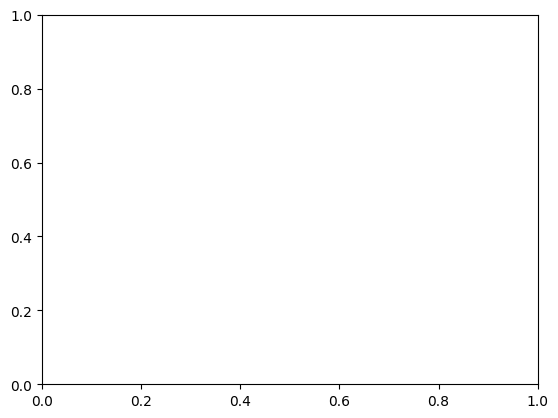

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

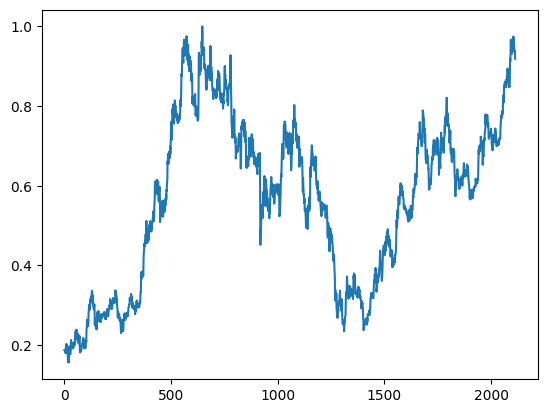

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [50]:
df3=scaler.inverse_transform(df3).tolist()

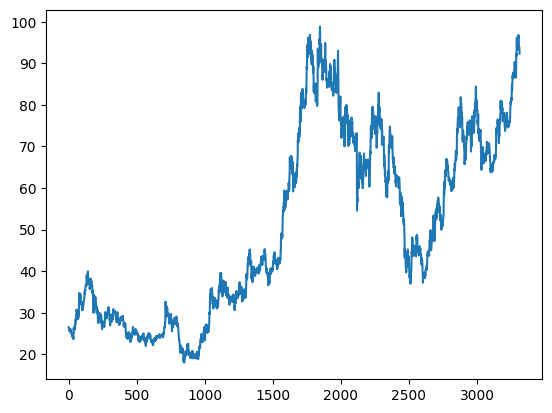

In [51]:
plt.plot(df3)